In [1]:
import numpy as np

def perceptron(inputs, weights, threshold):

    assert len(inputs) == len(weights)

    # multiply the inputs and weights
    values = np.multiply(inputs,weights)

    # sum the results
    total = sum(values)

    # decide if we should activate the perceptron
    if total < threshold:
        return 0
    else:
        return 1


In [2]:
inputs = [[0.0,0.0],[1.0,0.0],[0.0,1.0],[1.0,1.0]]
for input in inputs:
    print(input,perceptron(input, [0.5,0.5], 0.5))


[0.0, 0.0] 0
[1.0, 0.0] 1
[0.0, 1.0] 1
[1.0, 1.0] 1


In [3]:
inputs = [[0.0,0.0],[1.0,0.0],[0.0,1.0],[1.0,1.0]]
for input in inputs:
    print(input,perceptron(input, [0.5,0.5], 1.0))


[0.0, 0.0] 0
[1.0, 0.0] 0
[0.0, 1.0] 0
[1.0, 1.0] 1


In [4]:
inputs = [[0.0,1.0],[1.0,1.0]]
for input in inputs:
    print(input,perceptron(input, [-1.0,1.0], 1.0))


[0.0, 1.0] 1
[1.0, 1.0] 0


In [5]:
import sklearn.datasets as skl_data
data, labels = skl_data.fetch_openml('mnist_784', version=1, return_X_y=True)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [6]:
print(data.shape)
data.head()


(70000, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data = data / 255.0
#data.head()



In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=.10, random_state=42, stratify=labels)
print(X_train.shape)
print(X_test.shape)


(63000, 784)
(7000, 784)


In [10]:
import sklearn.neural_network as skl_nn
mlp = skl_nn.MLPClassifier(hidden_layer_sizes=(50), max_iter=50, verbose=1, random_state=1)
mlp.fit(X_train,y_train)


Iteration 1, loss = 2.19801187
Iteration 2, loss = 1.72083441
Iteration 3, loss = 1.25650217
Iteration 4, loss = 0.97625825
Iteration 5, loss = 0.80435706
Iteration 6, loss = 0.68848820
Iteration 7, loss = 0.60547129
Iteration 8, loss = 0.54503469
Iteration 9, loss = 0.50051391
Iteration 10, loss = 0.46660400
Iteration 11, loss = 0.44055742
Iteration 12, loss = 0.41987000
Iteration 13, loss = 0.40309759
Iteration 14, loss = 0.38917339
Iteration 15, loss = 0.37747862
Iteration 16, loss = 0.36765191
Iteration 17, loss = 0.35900104
Iteration 18, loss = 0.35159888
Iteration 19, loss = 0.34476002
Iteration 20, loss = 0.33874249
Iteration 21, loss = 0.33338153
Iteration 22, loss = 0.32856108
Iteration 23, loss = 0.32395019
Iteration 24, loss = 0.31984625
Iteration 25, loss = 0.31589155
Iteration 26, loss = 0.31241112
Iteration 27, loss = 0.30881627
Iteration 28, loss = 0.30559822
Iteration 29, loss = 0.30236211
Iteration 30, loss = 0.29956595
Iteration 31, loss = 0.29657704
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=50, max_iter=50, random_state=1, verbose=1)

In [11]:
print("Training set score", mlp.score(X_train, y_train))
print("Testing set score", mlp.score(X_test, y_test))



Training set score 0.930968253968254
Testing set score 0.927


In [12]:
index = 0
test_digit = X_test.iloc[index].to_numpy().reshape(1,784)
test_digit_prediciton = mlp.predict(test_digit)[0]
print("Predicted value",test_digit_prediciton)
print("Actual value",y_test.iloc[index])


Predicted value 1
Actual value 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


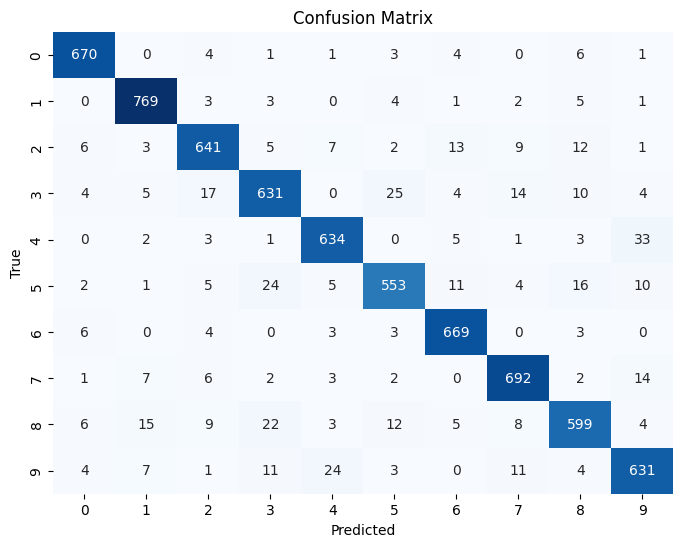

In [14]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

preds = []

for image in X_test.iterrows():
    # image contains a tuple of the row number and image data
    image = image[1].to_numpy().reshape(1,784)
    preds.append(mlp.predict(image)[0])

cm = confusion_matrix(y_test,preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [15]:
mlp2 = skl_nn.MLPClassifier(hidden_layer_sizes=(50), max_iter=50, verbose=1, random_state=1, learning_rate_init=0.1)

mlp2.fit(X_train,y_train)

print("Training set score", mlp2.score(X_train, y_train))
print("Testing set score", mlp2.score(X_test, y_test))


Iteration 1, loss = 0.53709976
Iteration 2, loss = 0.31126289
Iteration 3, loss = 0.29506059
Iteration 4, loss = 0.28476418
Iteration 5, loss = 0.25585414
Iteration 6, loss = 0.24638760
Iteration 7, loss = 0.24567224
Iteration 8, loss = 0.24092371
Iteration 9, loss = 0.23796965
Iteration 10, loss = 0.23270957
Iteration 11, loss = 0.23214976
Iteration 12, loss = 0.23249792
Iteration 13, loss = 0.22526789
Iteration 14, loss = 0.22893972
Iteration 15, loss = 0.21830237
Iteration 16, loss = 0.22473508
Iteration 17, loss = 0.21748707
Iteration 18, loss = 0.22057708
Iteration 19, loss = 0.22088354
Iteration 20, loss = 0.21675351
Iteration 21, loss = 0.21873765
Iteration 22, loss = 0.21914857
Iteration 23, loss = 0.20941445
Iteration 24, loss = 0.21612442
Iteration 25, loss = 0.21256775
Iteration 26, loss = 0.21018202
Iteration 27, loss = 0.21459546
Iteration 28, loss = 0.21524761
Iteration 29, loss = 0.21215998
Iteration 30, loss = 0.21173545
Iteration 31, loss = 0.20446205
Iteration 32, los

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
import numpy as np

# Load your dataset and labels here (e.g., data and labels are loaded into data and labels)
# Assuming data and labels are loaded into 'data' and 'labels'

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.20, random_state=42, stratify=labels)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Define a range of learning rate values to explore
learning_rates = [0.001, 0.01, 0.1]

# Initialize a dictionary to store cross-validation results
cv_results = {}

# Perform 4-fold cross-validation for each learning rate
for learning_rate in learning_rates:
    mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=3, learning_rate_init=learning_rate, random_state=42)
    scores = cross_val_score(mlp, X_train, y_train, cv=2, scoring='accuracy')
    cv_results[learning_rate] = scores.mean()

# Find the optimal learning rate based on cross-validation results
optimal_learning_rate = max(cv_results, key=cv_results.get)
optimal_score = cv_results[optimal_learning_rate]

print("Optimal Learning Rate:", optimal_learning_rate)
print("Optimal Cross-Validation Score:", optimal_score)

# Train the final model using the optimal learning rate on the combined train + validation set
final_X_train = np.vstack((X_train, X_validation))
final_y_train = np.hstack((y_train, y_validation))

final_model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, learning_rate_init=optimal_learning_rate, random_state=42)
final_model.fit(final_X_train, final_y_train)

# Assess the model on the held-out test set
test_score = final_model.score(X_test, y_test)
print("Test Set Score (Generalization Performance):", test_score)


Optimal Learning Rate: 0.01
Optimal Cross-Validation Score: 0.9102678571428571
Test Set Score (Generalization Performance): 0.9742857142857143


--------
## Ref

- https://uw-madison-datascience.github.io/2022-10-26-machine-learning-novice-sklearn/06-neural-networks/index.html
- https://humphryscomputing.com/Notes/Neural/single.neural.html